In [39]:
import torch.nn as nn
import torch
from torchvision import models, transforms
from datasets.linemod.dataset import DepthDataset
import torch
import os
import torch.nn.functional as F
from lib.loss_depth import L2Loss, GradientLoss, NormalLoss, BerHu
from torch import optim
import numpy as np
import time
import matplotlib.pyplot as plt
from lib.utils import setup_logger, im_convert, depth_to_img
from lib.network import DepthV3, DepthNetPSP, DepthV2
from lib.utils import visualize
import lib.evaluate as evaluate
from PIL import Image


%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore") 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dataset_root = "./datasets/linemod/Linemod_preprocessed"
log_dir = 'experiments/logs/depth_prediction'
outf = 'trained_models/depth_prediction'

In [3]:
eval_dataset = DepthDataset('eval', dataset_root)
dataloader = torch.utils.data.DataLoader(eval_dataset, 
                                             batch_size=1, 
                                             shuffle=True, 
                                             num_workers=1)

Object 2 buffer loaded
Object 4 buffer loaded
Object 5 buffer loaded
Object 10 buffer loaded
Object 11 buffer loaded


In [4]:
def select_model(version):
    if version == 3:
        model = 'trained_models/depth_prediction/depthv3_71.07109753379609.pth'
        estimator = DepthV3((480, 640))
        estimator.load_state_dict(torch.load(model))
    elif version == 2:
        model = 'trained_models/depth_prediction/depthv2_0.0002779090425557933.pth'
        estimator = DepthV2((480, 640))
        estimator.load_state_dict(torch.load(model))
    else:
        model = 'trained_models/depth_prediction/depthv1_0.0005158761957811202.pth'
        estimator = DepthNetPSP()
        estimator.load_state_dict(torch.load(model))
    return estimator

def plot_depth(version, img, depth):
    estimator = select_model(version=version)    
    estimator.cuda()
    estimator.eval()

    pred_depth = estimator(img).cpu().detach().view(480, 640)
    depth = depth.cpu().view(480, 640)

    visualize(img, depth, pred_depth)
    
def eval_models(version, dataloader):
    estimator = select_model(version=version)    
    estimator.cuda()
    estimator.eval()
    return_log=False
    if version==1 or version == 2:
        return_log = True
    evaluate.run_eval(estimator, dataloader, return_log=return_log)
    

# Store predicted depth results

In [44]:
mode = 'train'
root = "./datasets/linemod/Linemod_preprocessed"
estimator = select_model(3)
estimator.cuda()
trans = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])])

Item 2
1.1049723756906078 %
2.2099447513812156 %
3.314917127071823 %
4.419889502762431 %
5.524861878453039 %
6.629834254143646 %
7.734806629834254 %
8.839779005524862 %
9.94475138121547 %
11.049723756906078 %
12.154696132596685 %
13.259668508287293 %
14.3646408839779 %
15.469613259668508 %
16.574585635359117 %
17.679558011049725 %
18.784530386740332 %
19.88950276243094 %
20.994475138121548 %
22.099447513812155 %
23.204419889502763 %
24.30939226519337 %
25.414364640883978 %
26.519337016574585 %
27.624309392265193 %


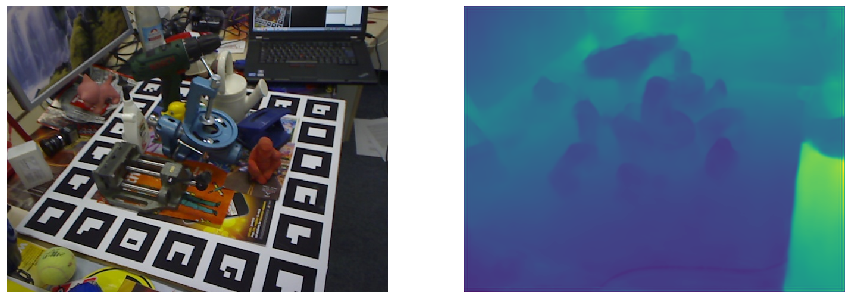

28.7292817679558 %
29.834254143646408 %
30.939226519337016 %
32.04419889502763 %
33.149171270718234 %
34.25414364640884 %
35.35911602209945 %
36.46408839779006 %
37.569060773480665 %
38.67403314917127 %
39.77900552486188 %
40.88397790055249 %
41.988950276243095 %
43.0939226519337 %
44.19889502762431 %
45.30386740331492 %
46.408839779005525 %
47.51381215469613 %
48.61878453038674 %
49.72375690607735 %
50.828729281767956 %
51.93370165745856 %
53.03867403314917 %
54.14364640883978 %
55.248618784530386 %


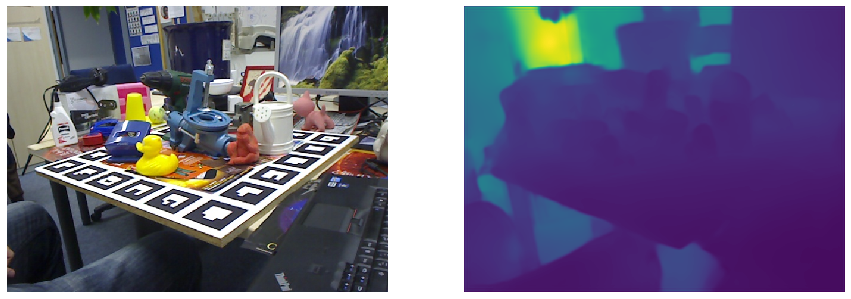

56.353591160220994 %
57.4585635359116 %
58.56353591160221 %
59.668508287292816 %
60.773480662983424 %
61.87845303867403 %
62.98342541436464 %
64.08839779005525 %
65.19337016574586 %
66.29834254143647 %
67.40331491712708 %
68.50828729281768 %
69.61325966850829 %
70.7182320441989 %
71.8232044198895 %
72.92817679558011 %
74.03314917127072 %
75.13812154696133 %
76.24309392265194 %
77.34806629834254 %
78.45303867403315 %
79.55801104972376 %
80.66298342541437 %
81.76795580110497 %
82.87292817679558 %


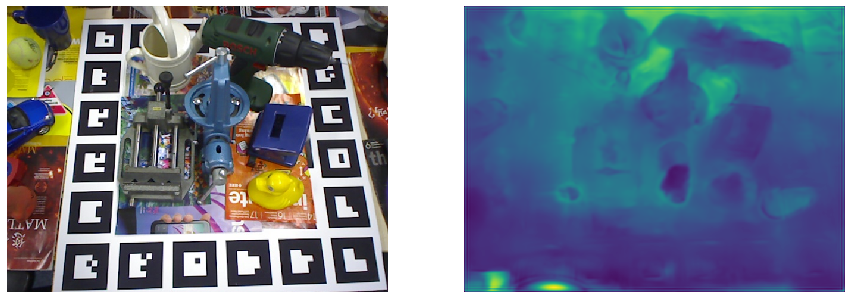

83.97790055248619 %
85.0828729281768 %
86.1878453038674 %
87.29281767955801 %
88.39779005524862 %
89.50276243093923 %
90.60773480662984 %
91.71270718232044 %
92.81767955801105 %
93.92265193370166 %
95.02762430939227 %
96.13259668508287 %
97.23756906077348 %
98.34254143646409 %
99.4475138121547 %
Item 4
1.1049723756906078 %
2.2099447513812156 %
3.314917127071823 %
4.419889502762431 %
5.524861878453039 %
6.629834254143646 %
7.734806629834254 %
8.839779005524862 %
9.94475138121547 %
11.049723756906078 %
12.154696132596685 %
13.259668508287293 %
14.3646408839779 %
15.469613259668508 %
16.574585635359117 %
17.679558011049725 %
18.784530386740332 %
19.88950276243094 %
20.994475138121548 %
22.099447513812155 %
23.204419889502763 %
24.30939226519337 %
25.414364640883978 %
26.519337016574585 %
27.624309392265193 %


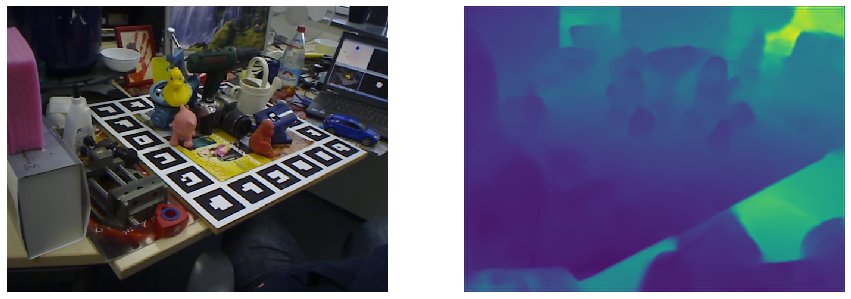

28.7292817679558 %
29.834254143646408 %
30.939226519337016 %
32.04419889502763 %
33.149171270718234 %
34.25414364640884 %
35.35911602209945 %
36.46408839779006 %
37.569060773480665 %
38.67403314917127 %
39.77900552486188 %
40.88397790055249 %
41.988950276243095 %
43.0939226519337 %
44.19889502762431 %
45.30386740331492 %
46.408839779005525 %
47.51381215469613 %
48.61878453038674 %
49.72375690607735 %
50.828729281767956 %
51.93370165745856 %
53.03867403314917 %
54.14364640883978 %
55.248618784530386 %


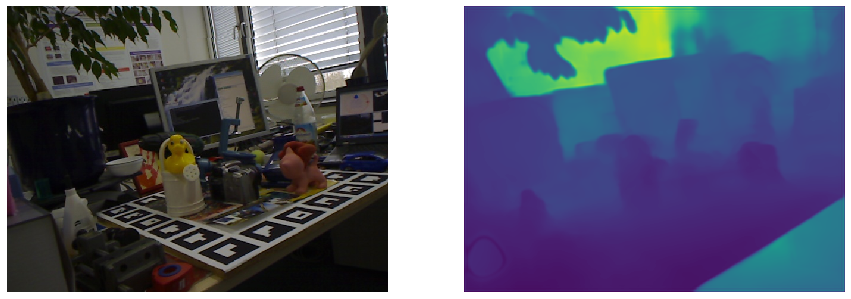

56.353591160220994 %
57.4585635359116 %
58.56353591160221 %
59.668508287292816 %
60.773480662983424 %
61.87845303867403 %
62.98342541436464 %
64.08839779005525 %
65.19337016574586 %
66.29834254143647 %
67.40331491712708 %
68.50828729281768 %
69.61325966850829 %
70.7182320441989 %
71.8232044198895 %
72.92817679558011 %
74.03314917127072 %
75.13812154696133 %
76.24309392265194 %
77.34806629834254 %
78.45303867403315 %
79.55801104972376 %
80.66298342541437 %
81.76795580110497 %
82.87292817679558 %


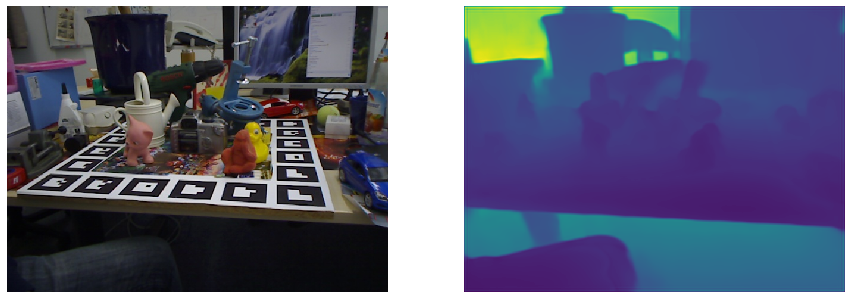

83.97790055248619 %
85.0828729281768 %
86.1878453038674 %
87.29281767955801 %
88.39779005524862 %
89.50276243093923 %
90.60773480662984 %
91.71270718232044 %
92.81767955801105 %
93.92265193370166 %
95.02762430939227 %
96.13259668508287 %
97.23756906077348 %
98.34254143646409 %
99.4475138121547 %
Item 5
1.1111111111111112 %
2.2222222222222223 %
3.3333333333333335 %
4.444444444444445 %
5.555555555555555 %
6.666666666666667 %
7.777777777777778 %
8.88888888888889 %
10.0 %
11.11111111111111 %
12.222222222222221 %
13.333333333333334 %
14.444444444444445 %
15.555555555555555 %
16.666666666666668 %
17.77777777777778 %
18.88888888888889 %
20.0 %
21.11111111111111 %
22.22222222222222 %
23.333333333333332 %
24.444444444444443 %
25.555555555555557 %
26.666666666666668 %
27.77777777777778 %


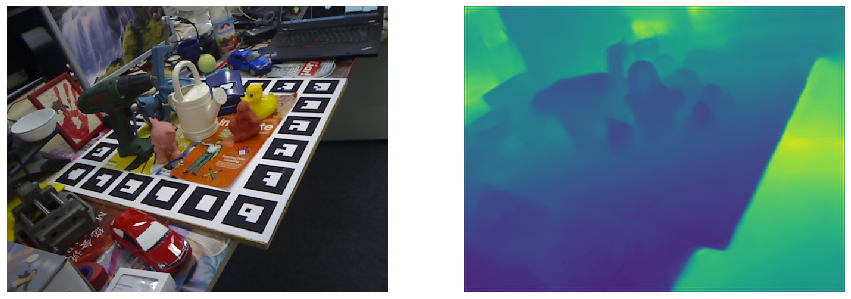

28.88888888888889 %
30.0 %
31.11111111111111 %
32.22222222222222 %
33.333333333333336 %
34.44444444444444 %
35.55555555555556 %
36.666666666666664 %
37.77777777777778 %
38.888888888888886 %
40.0 %
41.111111111111114 %
42.22222222222222 %
43.333333333333336 %
44.44444444444444 %
45.55555555555556 %
46.666666666666664 %
47.77777777777778 %
48.888888888888886 %
50.0 %
51.111111111111114 %
52.22222222222222 %
53.333333333333336 %
54.44444444444444 %
55.55555555555556 %


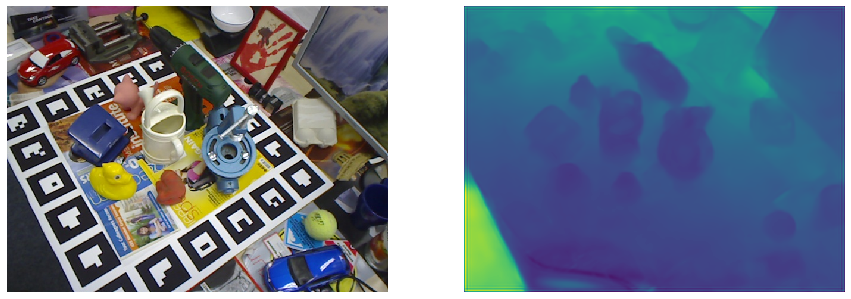

56.666666666666664 %
57.77777777777778 %
58.888888888888886 %
60.0 %
61.111111111111114 %
62.22222222222222 %
63.333333333333336 %
64.44444444444444 %
65.55555555555556 %
66.66666666666667 %
67.77777777777777 %
68.88888888888889 %
70.0 %
71.11111111111111 %
72.22222222222223 %
73.33333333333333 %
74.44444444444444 %
75.55555555555556 %
76.66666666666667 %
77.77777777777777 %
78.88888888888889 %
80.0 %
81.11111111111111 %
82.22222222222223 %
83.33333333333333 %


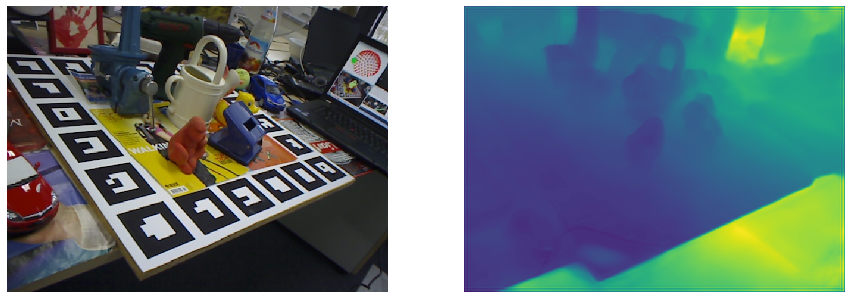

84.44444444444444 %
85.55555555555556 %
86.66666666666667 %
87.77777777777777 %
88.88888888888889 %
90.0 %
91.11111111111111 %
92.22222222222223 %
93.33333333333333 %
94.44444444444444 %
95.55555555555556 %
96.66666666666667 %
97.77777777777777 %
98.88888888888889 %
100.0 %
Item 10
1.0638297872340425 %
2.127659574468085 %
3.1914893617021276 %
4.25531914893617 %
5.319148936170213 %
6.382978723404255 %
7.446808510638298 %
8.51063829787234 %
9.574468085106384 %
10.638297872340425 %
11.702127659574469 %
12.76595744680851 %
13.829787234042554 %
14.893617021276595 %
15.957446808510639 %
17.02127659574468 %
18.085106382978722 %
19.148936170212767 %
20.21276595744681 %
21.27659574468085 %
22.340425531914892 %
23.404255319148938 %
24.46808510638298 %
25.53191489361702 %
26.595744680851062 %


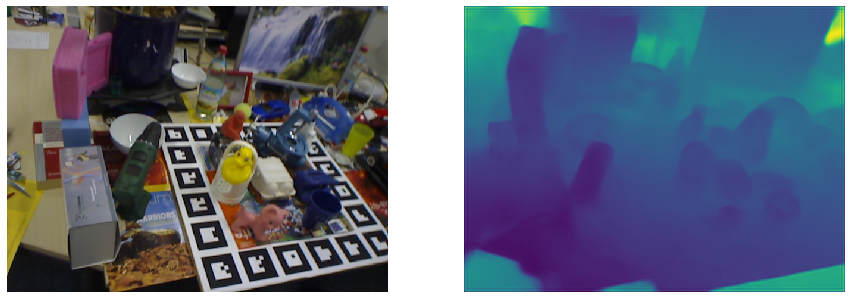

27.659574468085108 %
28.72340425531915 %
29.78723404255319 %
30.851063829787233 %
31.914893617021278 %
32.97872340425532 %
34.04255319148936 %
35.1063829787234 %
36.170212765957444 %
37.234042553191486 %
38.297872340425535 %
39.361702127659576 %
40.42553191489362 %
41.48936170212766 %
42.5531914893617 %
43.61702127659574 %
44.680851063829785 %
45.744680851063826 %
46.808510638297875 %
47.87234042553192 %
48.93617021276596 %
50.0 %
51.06382978723404 %
52.12765957446808 %
53.191489361702125 %


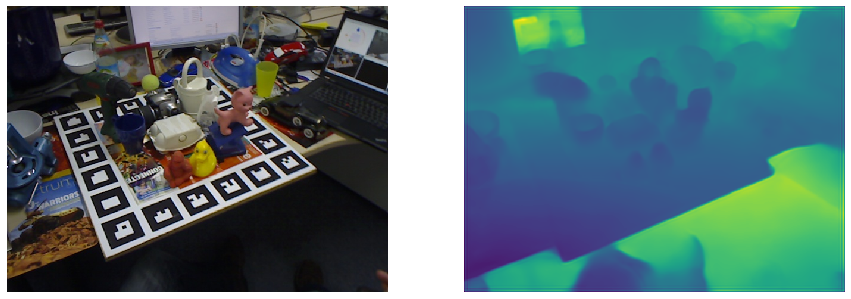

54.255319148936174 %
55.319148936170215 %
56.38297872340426 %
57.4468085106383 %
58.51063829787234 %
59.57446808510638 %
60.638297872340424 %
61.702127659574465 %
62.765957446808514 %
63.829787234042556 %
64.8936170212766 %
65.95744680851064 %
67.02127659574468 %
68.08510638297872 %
69.14893617021276 %
70.2127659574468 %
71.27659574468085 %
72.34042553191489 %
73.40425531914893 %
74.46808510638297 %
75.53191489361703 %
76.59574468085107 %
77.65957446808511 %
78.72340425531915 %
79.7872340425532 %


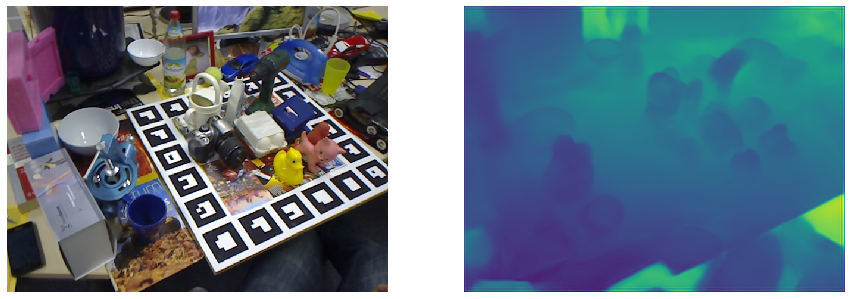

80.85106382978724 %
81.91489361702128 %
82.97872340425532 %
84.04255319148936 %
85.1063829787234 %
86.17021276595744 %
87.23404255319149 %
88.29787234042553 %
89.36170212765957 %
90.42553191489361 %
91.48936170212765 %
92.55319148936171 %
93.61702127659575 %
94.68085106382979 %
95.74468085106383 %
96.80851063829788 %
97.87234042553192 %
98.93617021276596 %
100.0 %
Item 11
1.0869565217391304 %
2.1739130434782608 %
3.260869565217391 %
4.3478260869565215 %
5.434782608695652 %
6.521739130434782 %
7.608695652173913 %
8.695652173913043 %
9.782608695652174 %
10.869565217391305 %
11.956521739130435 %
13.043478260869565 %
14.130434782608695 %
15.217391304347826 %
16.304347826086957 %
17.391304347826086 %
18.47826086956522 %
19.565217391304348 %
20.652173913043477 %
21.73913043478261 %
22.82608695652174 %
23.91304347826087 %
25.0 %
26.08695652173913 %
27.17391304347826 %


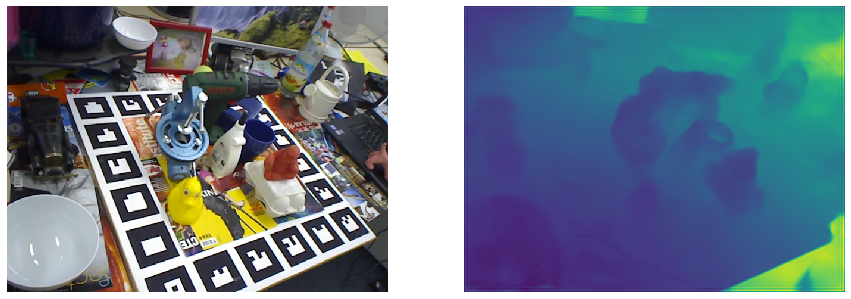

28.26086956521739 %
29.347826086956523 %
30.434782608695652 %
31.52173913043478 %
32.608695652173914 %
33.69565217391305 %
34.78260869565217 %
35.869565217391305 %
36.95652173913044 %
38.04347826086956 %
39.130434782608695 %
40.21739130434783 %
41.30434782608695 %
42.391304347826086 %
43.47826086956522 %
44.56521739130435 %
45.65217391304348 %
46.73913043478261 %
47.82608695652174 %
48.91304347826087 %
50.0 %
51.08695652173913 %
52.17391304347826 %
53.26086956521739 %
54.34782608695652 %


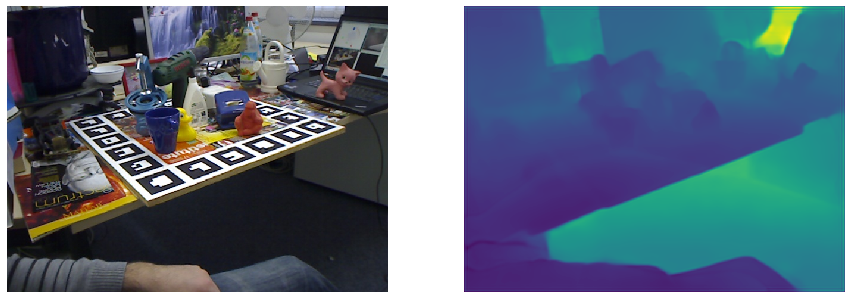

55.43478260869565 %
56.52173913043478 %
57.608695652173914 %
58.69565217391305 %
59.78260869565217 %
60.869565217391305 %
61.95652173913044 %
63.04347826086956 %
64.1304347826087 %
65.21739130434783 %
66.30434782608695 %
67.3913043478261 %
68.47826086956522 %
69.56521739130434 %
70.65217391304348 %
71.73913043478261 %
72.82608695652173 %
73.91304347826087 %
75.0 %
76.08695652173913 %
77.17391304347827 %
78.26086956521739 %
79.34782608695652 %
80.43478260869566 %
81.52173913043478 %


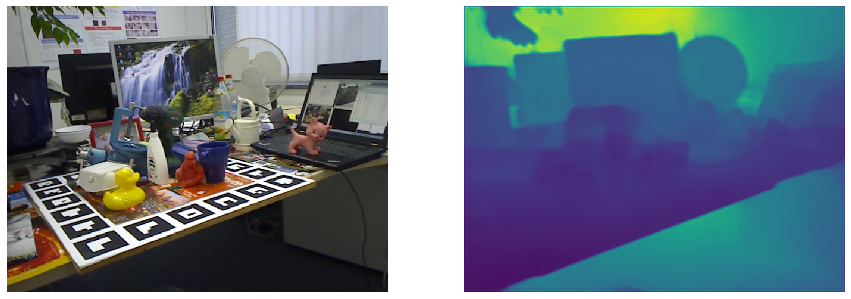

82.6086956521739 %
83.69565217391305 %
84.78260869565217 %
85.8695652173913 %
86.95652173913044 %
88.04347826086956 %
89.1304347826087 %
90.21739130434783 %
91.30434782608695 %
92.3913043478261 %
93.47826086956522 %
94.56521739130434 %
95.65217391304348 %
96.73913043478261 %
97.82608695652173 %
98.91304347826087 %
100.0 %


In [45]:
objlist = [2, 4, 5, 10, 11]
item_count = 0

for item in objlist:
    print("============\nItem", item)
    files = []
    count = 0
    input_file = open('{0}/data/{1}/{2}.txt'.format(root, '%02d' % item, mode))
    while 1:
        item_count += 1
        input_line = input_file.readline()
        if mode == 'test' and item_count % 10 != 0:
            continue
        if not input_line:
            break
        if input_line[-1:] == '\n':
            input_line = input_line[:-1]
        files.append(input_line) 

    folder_obj = '{0}/data/{1}/'.format(root, '%02d' % item)
    base_depth_predicted_path = folder_obj + 'depth_predicted'
    base_rgb_path = folder_obj + 'rgb'
#     os.mkdir(base_depth_predicted_path)

    for file_name in files:
        rgb_img_path = base_rgb_path + '/' + file_name + '.png'
        pred_depth_path = base_depth_predicted_path + '/' + file_name

        rgb = Image.open(rgb_img_path).convert('RGB')
        img = trans(rgb)
        img = img.unsqueeze(0).cuda()

        pred_depth = estimator(img).cpu().detach().numpy()

        np.save(pred_depth_path, pred_depth)
#         print(rgb_img_path, pred_depth_path)
        count += 1
        if count % 2 == 0:
            print(count * 100 / len(files), "%")

        if count % 50 == 0:

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
            ax1.imshow(rgb)
            ax1.axis("off")

            max_d = np.max(pred_depth)
            min_d = np.min(pred_depth)
            depth_norm = (pred_depth - min_d) * 255 / (max_d - min_d)
            ax2.imshow(depth_norm.reshape(480, 640))
            ax2.axis("off")

            plt.show()
